# Однофакторный дисперсионный анализ (One-way ANOVA)

Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 

Генотерапия позволяет корректировать работу дефективного гена, ответственного за развитие заболевания. В эксперименте сравнивалась эффективность четырех различных типов терапии.

In [1]:
# импортируем
import pandas as pd
import scipy.stats as stats

In [2]:
# читаем csv
data = pd.read_csv('genetherapy.csv')
data.columns

Index(['expr', 'Therapy'], dtype='object')

In [3]:
data.head(10)

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A
5,99,A
6,97,A
7,96,A
8,98,A
9,106,A


In [4]:
# какие варианты терапии есть
data["Therapy"].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [5]:
# разбиваем на группы
cond_therapy_A = data["Therapy"] == "A"
cond_therapy_B = data["Therapy"] == "B"
cond_therapy_C = data["Therapy"] == "C"
cond_therapy_D = data["Therapy"] == "D"
# забираем уровень экспрессии по группам
expr_A = data[cond_therapy_A]["expr"]
expr_B = data[cond_therapy_B]["expr"]
expr_C = data[cond_therapy_C]["expr"]
expr_D = data[cond_therapy_D]["expr"]

In [6]:
# считаем F-значение
result = stats.f_oneway(expr_A, expr_B, expr_C, expr_D)
print('F =', round(result[0], 4), '\np =', round(result[1], 4))

F = 8.0373 
p = 0.0002


### Предварительный вывод
**p < 0.05**, можно смело отклонить нулевую гипотезу и как минимум 2 средних отличаются между собой.

In [7]:
# выведем график
import matplotlib.pyplot as plt

therapies = data.Therapy.unique().tolist()
listAVG = [data[data.Therapy==i].expr.mean() for i in therapies]
listERR = [data[data.Therapy==i].expr.std() for i in therapies]

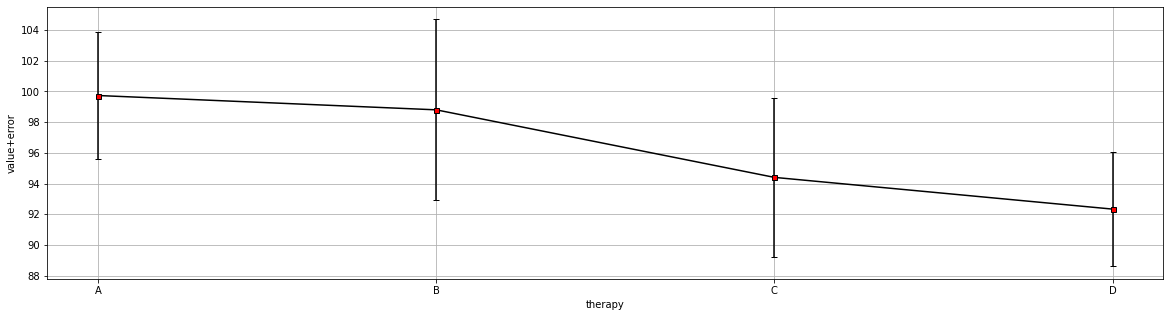

In [8]:
plt.figure(figsize=(20, 5))
plt.errorbar(x=therapies, y=listAVG, yerr=listERR, color="black", capsize=3, marker="s", markersize=5, mfc="red", mec="black")
plt.grid()
plt.xlabel('therapy')
plt.ylabel('value+error')
plt.show()

# Вывод
Терапии A и B, С и D имеют схожую эффективность, но в целом между группами она **разная**

In [9]:
# вывод сравнения пар с помощью поправки Тьюки

from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

MultiComp = MultiComparison(data['expr'], data['Therapy'])
print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


### Значимые различия в парах A-C, A-D, B-D